In [1]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
import matplotlib.pyplot as plt
import sklearn.model_selection as skm


from sklearn.tree import (
    DecisionTreeClassifier as DTC,
    DecisionTreeRegressor as DTR,
    plot_tree,
    export_text,
)
from sklearn.metrics import accuracy_score, log_loss
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import train_test_split
from ISLP import confusion_table

from sklearn.datasets import load_iris

# 分类树（Decision Trees）

我们首先使用分类树来分析 `Iris` 数据集。
在该数据集中，`Label` 是一个具有 3 个取值的离散变量。我们现在使用 `DecisionTreeClassifier()` 来拟合一个分类树，以预测 `Label`，并使用除 `Label` 以外的所有变量作为预测因子。

设置分类器时需要指定几个参数，例如：
- **max_depth**：树的最大深度（控制树的生长深度）。
- **min_samples_split**：每个节点可分裂的最小观测样本数。
- **criterion**：用于分裂的准则（可选择 Gini 或交叉熵）。

此外，我们还会设置 **random_state** 以确保结果的可重复性；在分裂准则的结果相同时，分裂会随机处理。
首先，我们将数据分为训练集和测试集。

In [2]:
iris = load_iris()

# Print all 150 examples
print("(Number_of_examples, example_size) = ", iris.data.shape, "\n")
for i in range(0, 150):
    print("Input = ", iris.data[i], " , Label = ", iris.target[i])

(Number_of_examples, example_size) =  (150, 4) 

Input =  [5.1 3.5 1.4 0.2]  , Label =  0
Input =  [4.9 3.  1.4 0.2]  , Label =  0
Input =  [4.7 3.2 1.3 0.2]  , Label =  0
Input =  [4.6 3.1 1.5 0.2]  , Label =  0
Input =  [5.  3.6 1.4 0.2]  , Label =  0
Input =  [5.4 3.9 1.7 0.4]  , Label =  0
Input =  [4.6 3.4 1.4 0.3]  , Label =  0
Input =  [5.  3.4 1.5 0.2]  , Label =  0
Input =  [4.4 2.9 1.4 0.2]  , Label =  0
Input =  [4.9 3.1 1.5 0.1]  , Label =  0
Input =  [5.4 3.7 1.5 0.2]  , Label =  0
Input =  [4.8 3.4 1.6 0.2]  , Label =  0
Input =  [4.8 3.  1.4 0.1]  , Label =  0
Input =  [4.3 3.  1.1 0.1]  , Label =  0
Input =  [5.8 4.  1.2 0.2]  , Label =  0
Input =  [5.7 4.4 1.5 0.4]  , Label =  0
Input =  [5.4 3.9 1.3 0.4]  , Label =  0
Input =  [5.1 3.5 1.4 0.3]  , Label =  0
Input =  [5.7 3.8 1.7 0.3]  , Label =  0
Input =  [5.1 3.8 1.5 0.3]  , Label =  0
Input =  [5.4 3.4 1.7 0.2]  , Label =  0
Input =  [5.1 3.7 1.5 0.4]  , Label =  0
Input =  [4.6 3.6 1.  0.2]  , Label =  0
Input = 

In [3]:
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, test_size=0.3, random_state=42
)

In [4]:
# Learn a Decision Tree
clf = DTC(
    criterion="entropy",
    splitter="best",
    max_depth=5,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    class_weight=None,
)

clf = clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

 CONFUSION MATRIX
Truth       0   1   2
Predicted            
0          19   0   0
1           0  13   0
2           0   0  13


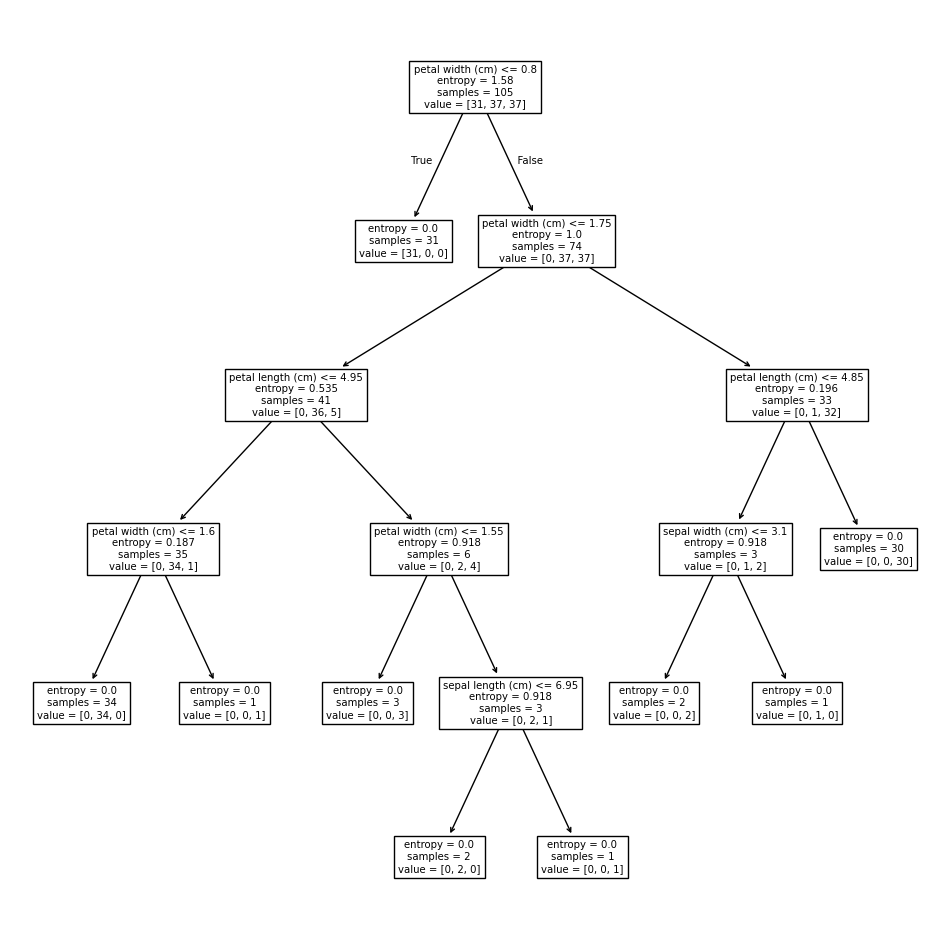

In [5]:
# Names of colums in a vector
feature_names = iris.feature_names

# Plot of the tree
ax = subplots(figsize=(12, 12))[1]
plot_tree(clf, feature_names=feature_names, ax=ax)

# Evaluate acuracy on test data
print(clf)
accuracy_score(y_test, clf.predict(X_test))

# accuracy_score : return the fraction of correctly classified samples (float)
y_true, y_pred = y_test, clf.predict(X_test)
print("\n CONFUSION MATRIX")
confusion = confusion_table(y_true, y_pred)
print(confusion)
plt.show()

我们构建另一棵最大深度为3的树，并将其与第一棵树进行比较。

In [6]:
clf1 = DTC(criterion="entropy", max_depth=3, random_state=42)
clf1.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

仅使用默认参数时，训练误差率为 3%。

对于分类树，我们可以通过 `log_loss()` 函数获取偏差值（deviance），计算公式如下：
$$
-2 \sum_m \sum_k n_{mk} \log \hat{p}_{mk},
$$
其中：
- $n_{mk}$ 表示在第 $m$ 个终端节点中属于第 $k$ 类的观测值数量，
- $\hat{p}_{mk}$ 是对应节点中属于第 $k$ 类的预测概率。

In [7]:
resid_dev = np.sum(log_loss(y_train, clf.predict_proba(X_train)))
print(resid_dev)
resid_dev1 = np.sum(log_loss(y_train, clf1.predict_proba(X_train)))
print(resid_dev1)

2.2204460492503136e-16
0.09093059547068776


根据偏差准则（deviance criterium），这两棵树中表现较好的是第一棵。

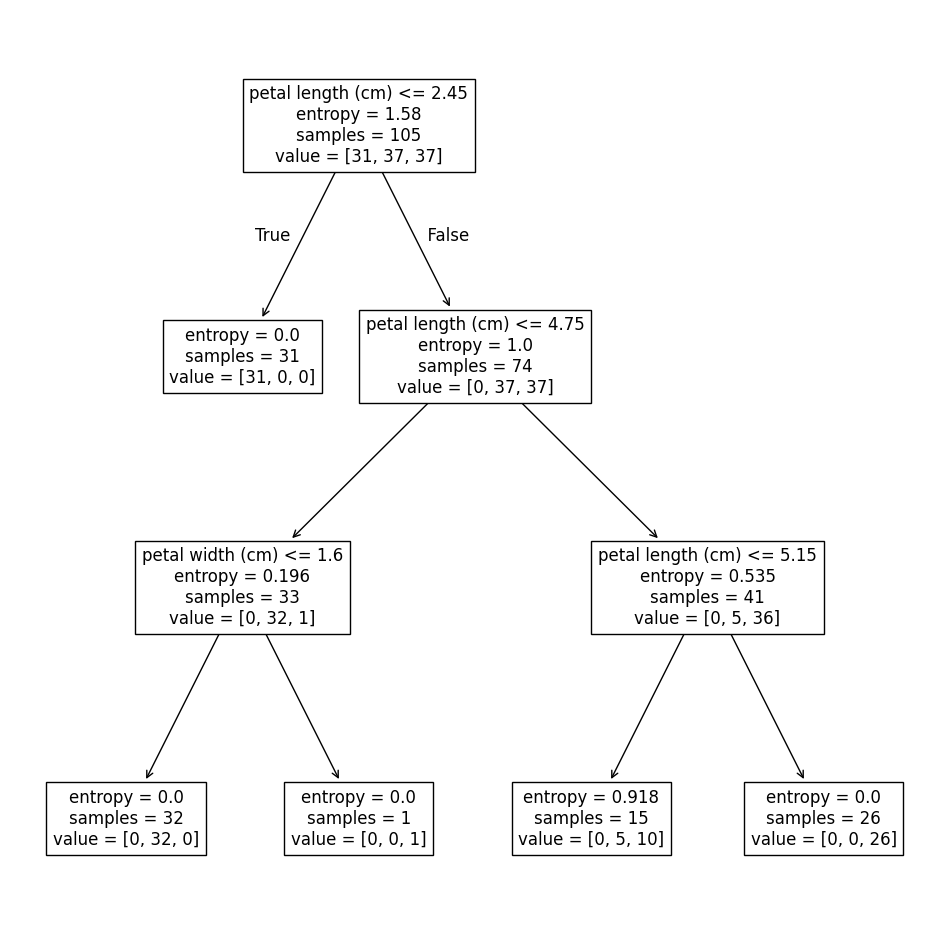

In [8]:
# Names of colums in a vector
feature_names = iris.feature_names

# Plot of the tree
ax = subplots(figsize=(12, 12))[1]
plot_tree(clf1, feature_names=feature_names, ax=ax)
plt.show()

我们计算测试集上的准确率，并比较这两棵树的表现。

In [9]:
print("Accuracy", accuracy_score(y_test, clf1.predict(X_test)))

confusion = confusion_table(clf1.predict(X_test), y_test)

confusion

Accuracy 0.9777777777777777


Truth,0,1,2
Predicted,,,
0,19,0,0
1,0,12,0
2,0,1,13


我们首先在训练集上重新拟合完整的决策树；此时不设置 `max_depth` 参数，因为我们将通过交叉验证学习这一参数。

接下来，我们使用 `clf` 的 `cost_complexity_pruning_path()` 方法来提取成本复杂度（cost-complexity）值。

In [10]:
clf = DTC(criterion="entropy", random_state=42)
clf.fit(X_train, y_train)

print("Accuracy", accuracy_score(y_test, clf.predict(X_test)))

confusion = confusion_table(clf.predict(X_test), y_test)

confusion

Accuracy 0.9777777777777777


Truth,0,1,2
Predicted,,,
0,19,0,0
1,0,13,1
2,0,0,12


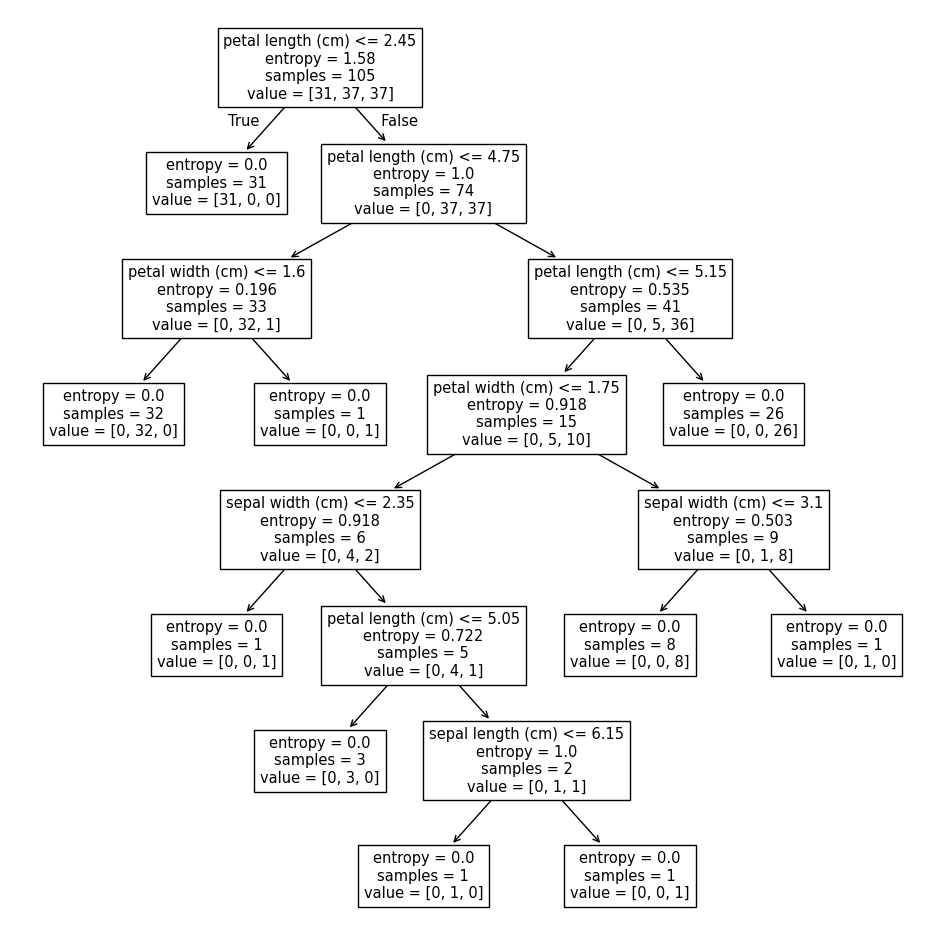

In [11]:
# Plot of the tree
ax = subplots(figsize=(12, 12))[1]
plot_tree(clf, feature_names=feature_names, ax=ax)
plt.show()

这将生成一组杂质（impurities）和相应的值，我们可以通过交叉验证从中提取一个最优值。请记住，我们使用偏差（Deviance）或基尼指数（Gini index）来构建决策树，而在剪枝时使用交叉验证并基于准确率准则（accuracy criterium）进行优化。

In [12]:
ccc_path = clf.cost_complexity_pruning_path(X_train, y_train)
kfold = skm.KFold(10, random_state=42, shuffle=True)
grid = skm.GridSearchCV(
    clf, {"ccp_alpha": ccc_path.ccp_alphas}, refit=True, cv=kfold, scoring="accuracy"
)
grid.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=DecisionTreeClassifier(criterion='entropy',
                                              random_state=42),
             param_grid={'ccp_alpha': array([0.        , 0.01718876, 0.01809652, 0.03935554, 0.06157149,
       0.07769766, 0.43430764, 0.87539185])},
             scoring='accuracy')

让我们来看一看剪枝后的树，它是通过交叉验证过程选择的最佳树。

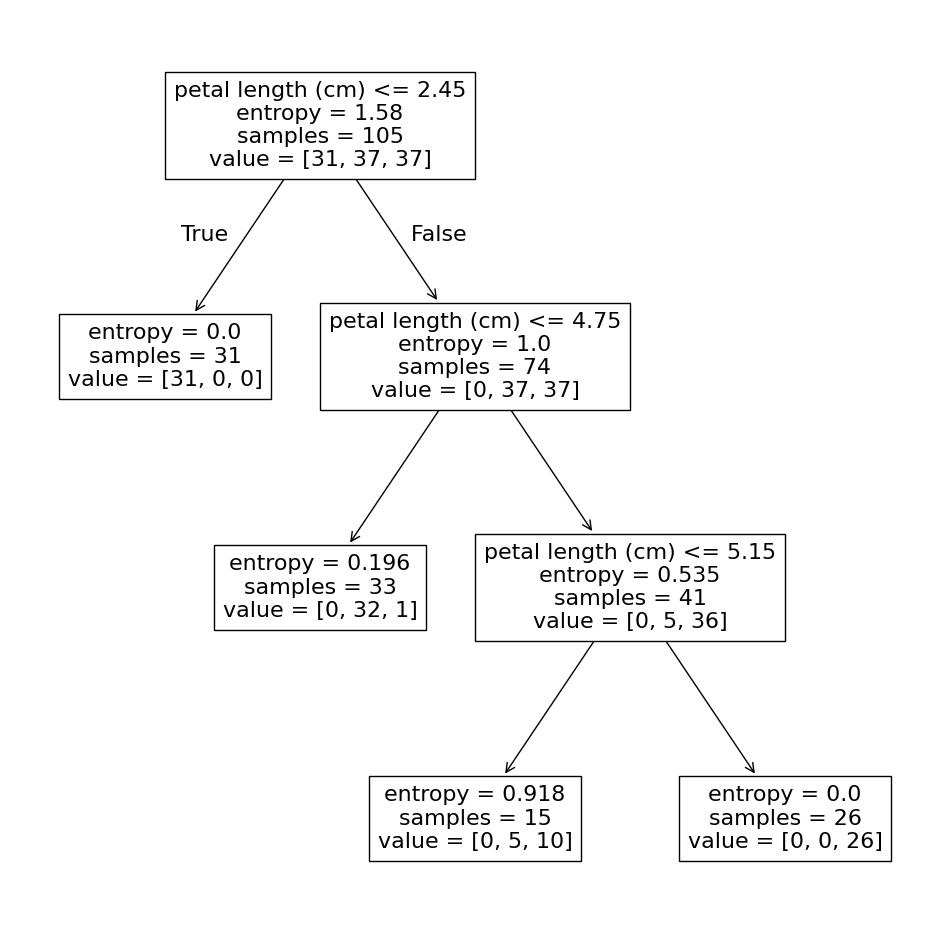

In [13]:
best_ = grid.best_estimator_
ax = subplots(figsize=(12, 12))[1]
plot_tree(best_, feature_names=feature_names, ax=ax)
plt.show()

我们对比测试集上最佳树的准确率，并将其与初始树的准确率进行比较。

In [14]:
print("Accuracy", accuracy_score(y_test, best_.predict(X_test)))

confusion = confusion_table(best_.predict(X_test), y_test)

confusion

Accuracy 0.9777777777777777


Truth,0,1,2
Predicted,,,
0,19,0,0
1,0,12,0
2,0,1,13


测试集上的最佳树包含 5 个节点。

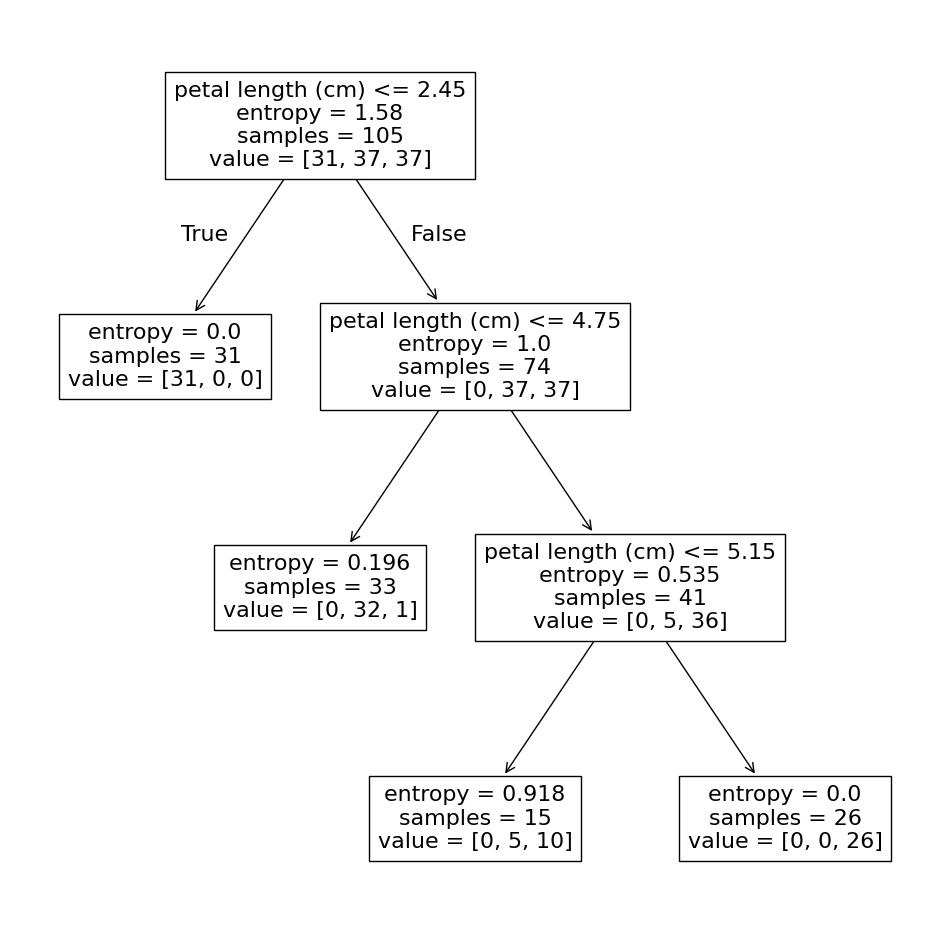

In [15]:
ax = subplots(figsize=(12, 12))[1]
best_ = grid.best_estimator_

plot_tree(best_, feature_names=feature_names, ax=ax)
plt.show()